In [1]:
import numpy as np
import h5py, tqdm
import matplotlib.pyplot as plt
import pandas as pd
from utilize import delta_R, deltaPhi 

In [2]:
alex_dataset = np.load('results_2020_10_15_nofilter.npz')

In [3]:
dataset = alex_dataset['dataset']
n_match = alex_dataset['n_match']
predictions = alex_dataset['predictions']
targets = alex_dataset['targets']

In [4]:
N_match_top_in_event = []
jet_parton_index = []
parton_jet_index = []
jet_parton_index_chi2 = []
parton_jet_index_chi2 = []
jet_pt = []
jet_phi = []
jet_eta = []
jet_barcode = []
jet_mass = []
jet_btag = []
parton_pt = []
parton_phi = []
parton_eta = []
parton_mass = []
chi2_value = []
delta_R_vector = []
chi2_vector = []

In [5]:
for i in tqdm.trange(1,24): 
    PREFIX = './compare/'
    FILENAME = ""
    seq_record = (PREFIX, "event_records_testing_with_chi2_", str(i),".h5")
    seq_vector = (PREFIX,"output_compare_", str(i),".h5")
    with h5py.File(FILENAME.join(seq_record),'r') as f:
        
        N_match_top_in_event.append(np.array(f['N_match_top_in_event'][:], dtype='object'))
        jet_parton_index.append(np.array(f['jet_parton_index'][:], dtype='object'))
        parton_jet_index.append(np.array(f['parton_jet_index'][:], dtype='object'))
        jet_parton_index_chi2.append(np.array(f['jet_parton_index_chi2'][:], dtype='object'))
        parton_jet_index_chi2.append(np.array(f['parton_jet_index_chi2'][:], dtype='object'))
        jet_pt.append(np.array(f['jet_pt'][:], dtype='object'))
        jet_phi.append(np.array(f['jet_phi'][:], dtype='object'))
        jet_eta.append(np.array(f['jet_eta'][:], dtype='object'))
        jet_barcode.append(np.array(f['jet_barcode'][:], dtype='object'))
        jet_mass.append(np.array(f['jet_mass'][:], dtype='object'))
        jet_btag.append(np.array(f['jet_btag'][:], dtype='object'))
        parton_pt.append(np.array(f['parton_pt'][:], dtype='object'))
        parton_phi.append(np.array(f['parton_phi'][:], dtype='object'))
        parton_eta.append(np.array(f['parton_eta'][:], dtype='object'))
        parton_mass.append(np.array(f['parton_mass'][:], dtype='object'))
        chi2_value.append(np.array(f['Chi2_value'][:], dtype='object'))

    with h5py.File(FILENAME.join(seq_vector),'r') as g:

        delta_R_vector.append(np.array(g['Delta_R_result'][:], dtype='object'))     
        chi2_vector.append(np.array(g['Chi2_result'][:], dtype='object'))   


100%|██████████| 23/23 [00:40<00:00,  1.75s/it]


In [6]:
N_match_top_in_event_tmp = []
jet_parton_index_tmp = []
parton_jet_index_tmp = []
jet_parton_index_chi2_tmp = []
parton_jet_index_chi2_tmp = []
jet_pt_tmp = []
jet_phi_tmp = []
jet_eta_tmp = []
jet_barcode_tmp = []
jet_mass_tmp = []
jet_btag_tmp = []
parton_pt_tmp = []
parton_phi_tmp = []
parton_eta_tmp = []
parton_mass_tmp = []
delta_R_vector_tmp = []
chi2_vector_tmp = []
chi2_value_tmp = []

for i in tqdm.trange(0,23):
    for a, b, c, d, e, f, g, h, j, k, l, m, n, o, s, u, w, x in zip(N_match_top_in_event[i], jet_parton_index[i], parton_jet_index[i], jet_parton_index_chi2[i], parton_jet_index_chi2[i], jet_pt[i], jet_phi[i], jet_eta[i], jet_barcode[i], jet_mass[i], jet_btag[i], parton_pt[i], parton_phi[i], parton_eta[i], parton_mass[i], delta_R_vector[i], chi2_vector[i], chi2_value[i]):
        N_match_top_in_event_tmp.append(a)
        jet_parton_index_tmp.append(b)
        parton_jet_index_tmp.append(c)
        jet_parton_index_chi2_tmp.append(d)
        parton_jet_index_chi2_tmp.append(e)
        jet_pt_tmp.append(f)
        jet_phi_tmp.append(g)
        jet_eta_tmp.append(h)
        jet_barcode_tmp.append(j)
        jet_mass_tmp.append(k)
        jet_btag_tmp.append(l)
        parton_pt_tmp.append(m)
        parton_phi_tmp.append(n)
        parton_eta_tmp.append(o)
        parton_mass_tmp.append(s)
        delta_R_vector_tmp.append(u)
        chi2_vector_tmp.append(w)
        chi2_value_tmp.append(x)
#print(len(N_match_top_in_event_tmp))
N_match_top_in_event = np.array(N_match_top_in_event_tmp, dtype='object')
jet_parton_index = np.array(jet_parton_index_tmp, dtype='object')
parton_jet_index = np.array(parton_jet_index_tmp, dtype='object')
jet_parton_index_chi2 = np.array(jet_parton_index_chi2_tmp, dtype='object')
parton_jet_index_chi2 = np.array(parton_jet_index_chi2_tmp, dtype='object')
jet_pt = np.array(jet_pt_tmp, dtype='object')
jet_phi = np.array(jet_phi_tmp, dtype='object')
jet_eta = np.array(jet_eta_tmp, dtype='object')
jet_barcode = np.array(jet_barcode_tmp, dtype='object')
jet_mass = np.array(jet_mass_tmp, dtype='object')
jet_btag = np.array(jet_btag_tmp, dtype='object')
parton_pt = np.array(parton_pt_tmp, dtype='object')
parton_phi = np.array(parton_phi_tmp, dtype='object')
parton_eta = np.array(parton_eta_tmp, dtype='object')
parton_mass = np.array(parton_mass_tmp, dtype='object')
delta_R_vector = np.array(delta_R_vector_tmp, dtype='object')
chi2_vector = np.array(chi2_vector_tmp, dtype='object')
chi2_value = np.array(chi2_value_tmp, dtype='object')

100%|██████████| 23/23 [00:03<00:00,  7.29it/s]


In [7]:
correct_1_chi2 = np.zeros(len(jet_pt))
correct_2_chi2 = np.zeros(len(jet_pt))
non_matched_chi2_1 = np.zeros(len(jet_pt))
non_matched_chi2_2 = np.zeros(len(jet_pt))

correct_1_chi2_alex = np.zeros(len(predictions))
correct_2_chi2_alex = np.zeros(len(predictions))
non_matched_chi2_1_alex = np.zeros(len(predictions))
non_matched_chi2_2_alex = np.zeros(len(predictions))

case = np.zeros(len(jet_pt))
pair_info_chi2 = []
pair_info_del = []

case_alex = np.zeros(len(predictions))
pair_info_chi2_alex = []
pair_info_del_alex = []

for i in range(len(case)):
    case[i] = 99999

for i in range(len(case_alex)):
    case_alex[i] = 99999


In [8]:
# case 1 : both correct 
# case 2 : 1 correct + 1 incorrect
# case 3 : both incorrect (but not non-matched)
# case 4 : correct/incorrect/non-matched + non-matched 
def compare(target1, target2):
    _case = 9999999
    _correct_1 = 0
    _correct_2 = 0
    _non_match_1 = 0
    _non_match_2 = 0

    b_1_del, b_2_del, q_1_del, q_2_del, q_3_del, q_4_del = target1[0], target1[3], target1[1], target1[2], target1[4], target1[5]
    b_1_chi2, b_2_chi2, q_1_chi2, q_2_chi2, q_3_chi2, q_4_chi2 = target2[0], target2[3], target2[1], target2[2], target2[4], target2[5]
    

    if np.isnan(b_1_chi2) == False or np.isnan(q_1_chi2) == False or np.isnan(q_2_chi2) == False:
        if np.isnan(b_2_chi2) == False or np.isnan(q_3_chi2) == False or np.isnan(q_4_chi2) == False:
            if b_1_chi2 == b_1_del and ( (q_1_chi2 == q_1_del and q_2_chi2 == q_2_del) or ( q_1_chi2 == q_2_del and q_2_chi2 == q_1_del) ):
                _correct_1 = 1
            elif b_1_chi2 == b_1_del and ( ((q_1_chi2 == q_1_del and q_2_chi2 != q_2_del) or (q_1_chi2 != q_1_del and q_2_chi2 == q_2_del)) 
                    or ((q_1_chi2 == q_2_del and q_2_chi2 != q_1_del) or (q_1_chi2 != q_2_del and q_2_chi2 == q_1_del)) 
                    or ((q_1_chi2 != q_1_del and q_2_chi2 != q_2_del) or (q_1_chi2 != q_2_del and q_2_chi2 != q_1_del)) ):
                _non_match_1 = 1
            else : pass

            if b_2_chi2 == b_2_del and ( (q_3_chi2 == q_3_del and q_4_chi2 == q_4_del) or ( q_3_chi2 == q_4_del and q_4_chi2 == q_3_del )):
                _correct_2 = 1
            elif b_2_chi2 == b_2_del and ( ((q_3_chi2 == q_3_del and q_4_chi2 != q_4_del) or (q_3_chi2 != q_3_del and q_4_chi2 != q_4_del)) 
                    or ((q_3_chi2 == q_4_del and q_4_chi2 != q_3_del) or (q_3_chi2 != q_4_del and q_4_chi2 != q_3_del)) 
                    or ((q_3_chi2 != q_3_del and q_4_chi2 != q_4_del) or (q_3_chi2 != q_4_del and q_4_chi2 != q_3_del)) ):
                _non_match_2 = 1
            else: pass 

            if b_1_chi2 == b_2_del and ( (q_1_chi2 == q_3_del and q_2_chi2 == q_4_del) or (q_1_chi2 == q_4_del and q_2_chi2 == q_3_del) ):
                _correct_1 = 1
            elif b_1_chi2 == b_2_del and ( ( (q_1_chi2 == q_3_del and q_2_chi2 != q_4_del)  or (q_1_chi2 != q_3_del and q_2_chi2 == q_4_del) ) 
                    or ( (q_1_chi2 == q_4_del and q_2_chi2 != q_3_del)  or (q_1_chi2 != q_4_del and q_2_chi2 == q_3_del) ) ):
                _non_match_1 = 1
            else : pass 

            if b_2_chi2 == b_1_del and ( (q_3_chi2 == q_1_del and q_4_chi2 == q_2_del) or (q_3_chi2 == q_2_del and q_4_chi2 == q_1_del) ):
                _correct_2 = 1
            elif b_2_chi2 == b_1_del and ( ( (q_3_chi2 == q_1_del and q_4_chi2 != q_2_del)  or (q_3_chi2 != q_1_del and q_4_chi2 == q_2_del) )
                    or ( (q_3_chi2 == q_2_del and q_4_chi2 != q_1_del)  or (q_3_chi2 != q_2_del and q_4_chi2 == q_1_del) ) ):
                _non_match_2 = 1
            else : pass

            if (b_1_chi2 != b_1_del and b_1_chi2 != b_2_del):
                _non_match_1 = 1
            
            if (b_2_chi2 != b_2_del and b_2_chi2 != b_1_del):
                _non_match_2 = 1
            
            if (b_1_chi2 == b_1_del and b_2_chi2 == b_2_del):
                if ( (q_1_chi2 == q_3_del and q_2_chi2 == q_4_del) or  (q_1_chi2 == q_4_del and q_2_chi2 == q_3_del)):
                    _correct_1 = 0
                elif ((q_3_chi2 == q_1_del and q_4_chi2 == q_2_del) or (q_3_chi2 == q_2_del and q_4_chi2 == q_1_del)):
                    _correct_2 = 0
                else: pass
            elif (b_1_chi2 == b_2_del and b_2_chi2 == b_1_del):
                if ( (q_1_chi2 == q_1_del and q_2_chi2 == q_2_del) or  (q_1_chi2 == q_2_del and q_2_chi2 == q_1_del)):
                    _correct_1 = 0
                elif ((q_3_chi2 == q_3_del and q_4_chi2 == q_4_del) or (q_3_chi2 == q_4_del and q_4_chi2 == q_3_del)):
                    _correct_2 = 0
                else: pass
            
            cand_1 = set([b_1_chi2, q_1_chi2, q_2_chi2])
            cand_2 = set([b_2_chi2, q_3_chi2, q_4_chi2])
            del_1 = set([b_1_del, q_1_del, q_2_del])
            del_2 = set([b_2_del, q_3_del, q_4_del])

            if bool(del_1.symmetric_difference(cand_1)) == False:
                if  _non_match_1 == 1:
                    _non_match_1 = 0
                else : 
                    pass
            elif bool(del_1.symmetric_difference(cand_2)) == False:
                if _non_match_2 == 1:
                    _non_match_2 = 0
                else : 
                    pass
            else : pass 

            if bool(del_2.symmetric_difference(cand_2)) == False:
                if _non_match_2 == 1:
                    _non_match_2 = 0
                else : 
                    pass
            elif bool(del_2.symmetric_difference(cand_1)) == False:
                if _non_match_1 == 1:
                    _non_match_1 = 0
                else :
                    pass

            if b_1_chi2 == q_1_chi2 or b_1_chi2 == q_2_chi2 or q_1_chi2 == q_2_chi2:
                _non_match_1 = 1
            else: pass

            if b_2_chi2 == q_3_chi2 or b_2_chi2 == q_4_chi2 or q_3_chi2 == q_4_chi2:
                _non_match_2 = 1
            else: pass

        else:   
            _non_match_2 = 1
            _correct_2 = 0
        
        if b_1_chi2 == b_1_del and ( (q_1_chi2 == q_1_del and q_2_chi2 == q_2_del) or ( q_1_chi2 == q_2_del and q_2_chi2 == q_1_del) ):
                _correct_1 = 1
        elif b_1_chi2 == b_1_del and ( ((q_1_chi2 == q_1_del and q_2_chi2 != q_2_del) or (q_1_chi2 != q_1_del and q_2_chi2 == q_2_del)) 
                    or ((q_1_chi2 == q_2_del and q_2_chi2 != q_1_del) or (q_1_chi2 != q_2_del and q_2_chi2 == q_1_del)) 
                    or ((q_1_chi2 != q_1_del and q_2_chi2 != q_2_del) or (q_1_chi2 != q_2_del and q_2_chi2 != q_1_del)) ):
                _non_match_1 = 1
        else : pass

        if b_1_chi2 == b_2_del and ( (q_1_chi2 == q_3_del and q_2_chi2 == q_4_del) or (q_1_chi2 == q_4_del and q_2_chi2 == q_3_del) ):
                _correct_1 = 1
        elif b_1_chi2 == b_2_del and ( ( (q_1_chi2 == q_3_del and q_2_chi2 != q_4_del)  or (q_1_chi2 != q_3_del and q_2_chi2 == q_4_del) ) 
                    or ( (q_1_chi2 == q_4_del and q_2_chi2 != q_3_del)  or (q_1_chi2 != q_4_del and q_2_chi2 == q_3_del) ) ):
                _non_match_1 = 1
        else : pass 
        
        if (b_1_chi2 != b_1_del and b_1_chi2 != b_2_del):
                _non_match_1 = 1

        cand_1 = set([b_1_chi2, q_1_chi2, q_2_chi2])
        cand_2 = set([b_2_chi2, q_3_chi2, q_4_chi2])
        del_1 = set([b_1_del, q_1_del, q_2_del])
        del_2 = set([b_2_del, q_3_del, q_4_del])

        if bool(del_1.symmetric_difference(cand_1)) == False:
            if  _non_match_1 == 1:
                _non_match_1 = 0
            else : 
                pass
        elif bool(del_1.symmetric_difference(cand_2)) == False:
            if _non_match_2 == 1:
                _non_match_2 = 0
            else : 
                pass
        else : pass 

        if bool(del_2.symmetric_difference(cand_2)) == False:
            if _non_match_2 == 1:
                _non_match_2 = 0
            else : 
                pass
        elif bool(del_2.symmetric_difference(cand_1)) == False:
            if _non_match_1 == 1:
                _non_match_1 = 0
            else :
                pass
        else : pass 

        if b_1_chi2 == q_1_chi2 or b_1_chi2 == q_2_chi2 or q_1_chi2 == q_2_chi2:
            _non_match_1 = 1
        else: pass
    else:
        _non_match_1 = 1
        
    # print(_correct_1, _correct_2, _non_match_1, _non_match_2)
    if _correct_1 == 1 and _correct_2 == 1 and _non_match_1 == 0 and _non_match_2 == 0:
        _case = 1
    elif  ( ( _correct_1 == 1 and _correct_2 == 0) or ( _correct_1 == 0 and _correct_2 == 1) ) and (_non_match_1 == 0 and _non_match_2 == 0) :
        _case = 2
    elif ( ( _correct_1 == 0 and _correct_2 == 0) and (_non_match_1 == 0 and _non_match_2 == 0) ):
        _case = 3
    elif (_non_match_1 == 1 or _non_match_2 == 1):
        _case = 4
    else:
        print("error occur!")
    
    pair_del = [b_1_del, q_1_del, q_2_del, b_2_del, q_3_del, q_4_del]
    pair_chi2 = [b_1_chi2,  q_1_chi2, q_2_chi2, b_2_chi2, q_3_chi2, q_4_chi2]
    pair_info_del.append(pair_del)
    pair_info_chi2.append(pair_chi2)
    return pair_del, pair_chi2, _case, _correct_1, _correct_2, _non_match_1, _non_match_2
        # print("\n")
        # print(pair_del, pair_chi2,"\n", correct_1_chi2[i], correct_2_chi2[i], non_matched_chi2_1[i], non_matched_chi2_2[i], case[i])

In [9]:
for i in tqdm.trange(len(predictions)):
# for i in range(0,50):
    tmp_origin = delta_R_vector[i][0]
    tmp_target = predictions[i]

    tmp_pair_del, tmp_pair_alex, tmp_case, tmp_correct_1, tmp_correct_2, tmp_non_match_1, tmp_non_match_2 = compare(tmp_origin, tmp_target)
    
    correct_1_chi2_alex[i] = tmp_correct_1
    correct_2_chi2_alex[i] = tmp_correct_2
    non_matched_chi2_1_alex[i] = tmp_non_match_1
    non_matched_chi2_2_alex[i] = tmp_non_match_2
    case_alex[i] = tmp_case
    pair_info_chi2_alex.append(tmp_pair_alex)
    pair_info_del_alex.append(tmp_pair_del)

100%|██████████| 1184256/1184256 [02:02<00:00, 9646.14it/s]


In [10]:
for i in tqdm.trange(len(jet_pt)):
# for i in range(0,50):
    tmp_origin = delta_R_vector[i][0]
    tmp_target = chi2_vector[i][0]

    tmp_pair_del, tmp_pair_chi2, tmp_case, tmp_correct_1, tmp_correct_2, tmp_non_match_1, tmp_non_match_2 = compare(tmp_origin, tmp_target)
    
    correct_1_chi2[i] = tmp_correct_1
    correct_2_chi2[i] = tmp_correct_2
    non_matched_chi2_1[i] = tmp_non_match_1
    non_matched_chi2_2[i] = tmp_non_match_2
    case[i] = tmp_case
    pair_info_chi2.append(tmp_pair_chi2)
    pair_info_del.append(tmp_pair_del)

100%|██████████| 1184448/1184448 [00:22<00:00, 53535.57it/s]


In [11]:
print( np.sum(case == 1),  np.sum(case == 2),  np.sum(case == 3),  np.sum(case == 4))

148710 31293 82380 922065


In [12]:
N_David_event = np.sum(case == 1) + np.sum(case == 2) + np.sum(case == 3) 
David_purity_event =  np.sum(case == 1)/N_David_event

David_purity_top = (np.sum(case == 1)*2 + np.sum(case == 2))/(2*N_David_event)
print(David_purity_event, David_purity_top)

0.5667669018190965 0.6263991950698026


In [13]:
print( np.sum(case_alex == 1),  np.sum(case_alex == 2),  np.sum(case_alex == 3),  np.sum(case_alex == 4))

326217 37181 13260 807598


In [14]:
N_Alex_event = np.sum(case_alex == 1) + np.sum(case_alex == 2) + np.sum(case_alex == 3) 
Alex_purity_event =  np.sum(case_alex == 1)/N_Alex_event

Alex_purity_top = (np.sum(case_alex == 1)*2 + np.sum(case_alex == 2))/(2*N_Alex_event)
print(Alex_purity_event, Alex_purity_top)

0.8660827594263231 0.9154392047958626


In [15]:
class four_vector():
    def __init__(self, idx1, idx2):
        try:
            self.pt = jet_pt[idx1][idx2]
            self.eta = jet_eta[idx1][idx2]
            self.phi = jet_phi[idx1][idx2]
            self.mass = jet_mass[idx1][idx2]
            scale = 1
            tmp_px = self.pt * np.cos(self.phi)
            tmp_py = self.pt * np.sin(self.phi)
            tmp_pz = self.pt * np.sinh(self.eta)
            self.px = tmp_px*scale
            self.py = tmp_py*scale
            self.pz = tmp_pz*scale
            self.e = np.sqrt( (self.px**2 + self.py**2 + self.pz**2) + self.mass**2 )
        except:
            print("Error occur!")
        

## David's Evaluation Plots


In [16]:
mjj_case_1 = []
mjj_case_2 = []
mjj_case_3 = []
mjj_case_4 = []

mjjj_case_1 = []
mjjj_case_2 = []
mjjj_case_3 = []
mjjj_case_4 = []

def two_jet_inv(target_1, target_2):
    return np.sqrt( ( target_1.e + target_2.e )**2 - ( target_1.px + target_2.px )**2 - ( target_1.py + target_2.py )**2 - ( target_1.pz + target_2.pz )**2)

def three_jet_inv(target_1, target_2, target_3):
    return np.sqrt( ( target_1.e + target_2.e + target_3.e )**2 - ( target_1.px + target_2.px + target_3.px )**2 - ( target_1.py + target_2.py + target_3.py )**2 - ( target_1.pz + target_2.pz + target_3.pz )**2)


for i in tqdm.trange(len(predictions)):
# for i in range(0,50):
    b_1_chi2_idx = pair_info_chi2[i][0]
    q_1_chi2_idx = pair_info_chi2[i][1]
    q_2_chi2_idx = pair_info_chi2[i][2]
    b_2_chi2_idx = pair_info_chi2[i][3]
    q_3_chi2_idx = pair_info_chi2[i][4]
    q_4_chi2_idx = pair_info_chi2[i][5]

    tmp_b_1 = four_vector(i, int(b_1_chi2_idx))
    tmp_q_1 = four_vector(i, int(q_1_chi2_idx))
    tmp_q_2 = four_vector(i, int(q_2_chi2_idx))
    tmp_b_2 = four_vector(i, int(b_2_chi2_idx))
    tmp_q_3 = four_vector(i, int(q_3_chi2_idx))
    tmp_q_4 = four_vector(i, int(q_4_chi2_idx))

    tmp_mjj_1, tmp_mjj_2, tmp_mjjj_1, tmp_mjjj_2 = 0,0,0,0
    try: 
        tmp_mjj_1 = two_jet_inv(tmp_q_1, tmp_q_2)
        tmp_mjj_2 = two_jet_inv(tmp_q_3, tmp_q_4)

        tmp_mjjj_1 = three_jet_inv(tmp_b_1, tmp_q_1, tmp_q_2)
        tmp_mjjj_2 = three_jet_inv(tmp_b_2, tmp_q_3, tmp_q_4)
    except:
        pass

    if case[i] == 1:
        mjj_case_1.append(tmp_mjj_1)
        mjj_case_1.append(tmp_mjj_2)

        mjjj_case_1.append(tmp_mjjj_1)
        mjjj_case_1.append(tmp_mjjj_2)
    elif case[i] == 2:
        mjj_case_2.append(tmp_mjj_1)
        mjj_case_2.append(tmp_mjj_2)

        mjjj_case_2.append(tmp_mjjj_1)
        mjjj_case_2.append(tmp_mjjj_2)
    elif case[i] == 3:
        mjj_case_3.append(tmp_mjj_1)
        mjj_case_3.append(tmp_mjj_2)

        mjjj_case_3.append(tmp_mjjj_1)
        mjjj_case_3.append(tmp_mjjj_2)
    else:
        mjj_case_4.append(tmp_mjj_1)
        mjj_case_4.append(tmp_mjj_2)

        mjjj_case_4.append(tmp_mjjj_1)
        mjjj_case_4.append(tmp_mjjj_2)

100%|██████████| 1184256/1184256 [02:41<00:00, 7353.12it/s]


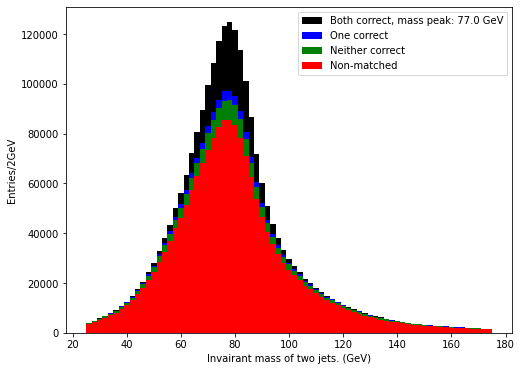

In [17]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_case_1+mjj_case_2+ mjj_case_3+mjj_case_4, bins=75, range=(25,175) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_case_1+mjj_case_2+ mjj_case_3+mjj_case_4, bins=75, histtype="stepfilled", range=(25,175), label="Both correct, mass peak: {} GeV".format(width[legend]), color='black', stacked=True)
plt.hist(mjj_case_4+mjj_case_3+mjj_case_2, bins=75, histtype="stepfilled", range=(25,175), label="One correct", color='blue', stacked=True)
plt.hist(mjj_case_4+mjj_case_3, bins=75, histtype="stepfilled", range=(25,175), label="Neither correct", color='green', stacked=True)
plt.hist(mjj_case_4, bins=75, histtype="stepfilled", range=(25,175), label='Non-matched', color='red', stacked=True)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj_FIX_JES.png")

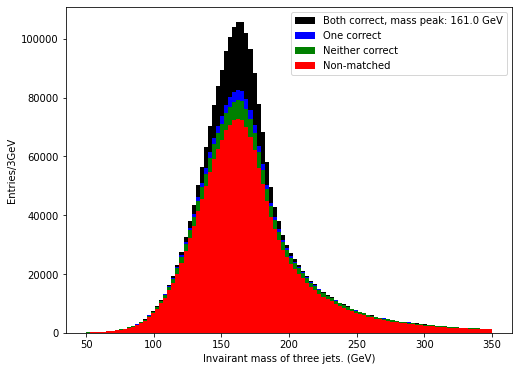

In [18]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjjj_case_1+mjjj_case_2+ mjjj_case_3+mjjj_case_4, bins=100, range=(50,350) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjjj_case_1+mjjj_case_2+ mjjj_case_3+mjjj_case_4, bins=100, histtype="stepfilled", range=(50,350), label="Both correct, mass peak: {} GeV".format(width[legend]), color='black', stacked=True)
plt.hist(mjjj_case_4+mjjj_case_3+mjjj_case_2, bins=100, histtype="stepfilled", range=(50,350), label="One correct", color='blue', stacked=True)
plt.hist(mjjj_case_4+mjjj_case_3, bins=100, histtype="stepfilled", range=(50,350), label="Neither correct", color='green', stacked=True)
plt.hist(mjjj_case_4, bins=100, histtype="stepfilled", range=(50,350), label='Non-matched', color='red', stacked=True)
plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/3GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjjj_FIX_JES.png")

In [19]:
chi2_value_case1 = []
chi2_value_case2 = []
chi2_value_case3 = []
chi2_value_case4 = []

for i in tqdm.trange(len(chi2_value)):
    if case[i] == 1:
        chi2_value_case1.append(chi2_value[i])
    elif case[i] == 2:
        chi2_value_case2.append(chi2_value[i])
    elif case[i] == 3:
        chi2_value_case3.append(chi2_value[i])
    else :
        chi2_value_case4.append(chi2_value[i])

100%|██████████| 1184448/1184448 [00:01<00:00, 685375.06it/s]


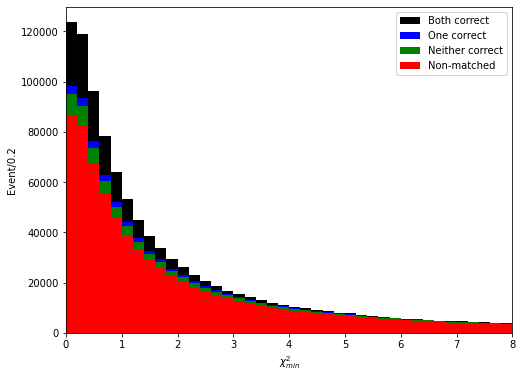

In [20]:
plt.figure(figsize=(8,6))
plt.hist(chi2_value_case4+chi2_value_case3+ chi2_value_case2+chi2_value_case1, bins=40, histtype="stepfilled", range=(0,8), label="Both correct", color='black', stacked=True)
plt.hist(chi2_value_case4+chi2_value_case3+chi2_value_case2, bins=40, histtype="stepfilled", range=(0,8), label="One correct", color='blue', stacked=True)
plt.hist(chi2_value_case4+chi2_value_case3, bins=40, histtype="stepfilled", range=(0,8), label="Neither correct", color='green', stacked=True)
plt.hist(chi2_value_case4, bins=40, histtype="stepfilled", range=(0,8), label='Non-matched', color='red', stacked=True)
plt.legend(loc="upper right")
plt.xlabel(r"$\chi^{2}_{min}$")
plt.ylabel("Event/0.2")
plt.xlim(0,8)
plt.savefig("./demo/Pic/evaluation/purity_chi2_dist.png")

## Alex's Evaluation Plots


In [21]:
mjj_case_1_alex = []
mjj_case_2_alex = []
mjj_case_3_alex = []
mjj_case_4_alex = []

mjjj_case_1_alex = []
mjjj_case_2_alex = []
mjjj_case_3_alex = []
mjjj_case_4_alex = []

def two_jet_inv(target_1, target_2):
    return np.sqrt( ( target_1.e + target_2.e )**2 - ( target_1.px + target_2.px )**2 - ( target_1.py + target_2.py )**2 - ( target_1.pz + target_2.pz )**2)

def three_jet_inv(target_1, target_2, target_3):
    return np.sqrt( ( target_1.e + target_2.e + target_3.e )**2 - ( target_1.px + target_2.px + target_3.px )**2 - ( target_1.py + target_2.py + target_3.py )**2 - ( target_1.pz + target_2.pz + target_3.pz )**2)


for i in tqdm.trange(len(predictions)):
    b_1_chi2_idx = pair_info_chi2_alex[i][0]
    q_1_chi2_idx = pair_info_chi2_alex[i][1]
    q_2_chi2_idx = pair_info_chi2_alex[i][2]
    b_2_chi2_idx = pair_info_chi2_alex[i][3]
    q_3_chi2_idx = pair_info_chi2_alex[i][4]
    q_4_chi2_idx = pair_info_chi2_alex[i][5]

    tmp_b_1 = four_vector(i, int(b_1_chi2_idx))
    tmp_q_1 = four_vector(i, int(q_1_chi2_idx))
    tmp_q_2 = four_vector(i, int(q_2_chi2_idx))
    tmp_b_2 = four_vector(i, int(b_2_chi2_idx))
    tmp_q_3 = four_vector(i, int(q_3_chi2_idx))
    tmp_q_4 = four_vector(i, int(q_4_chi2_idx))

    tmp_mjj_1, tmp_mjj_2, tmp_mjjj_1, tmp_mjjj_2 = 0,0,0,0
    try: 
        tmp_mjj_1 = two_jet_inv(tmp_q_1, tmp_q_2)
        tmp_mjj_2 = two_jet_inv(tmp_q_3, tmp_q_4)

        tmp_mjjj_1 = three_jet_inv(tmp_b_1, tmp_q_1, tmp_q_2)
        tmp_mjjj_2 = three_jet_inv(tmp_b_2, tmp_q_3, tmp_q_4)
    except:
        pass

    if case_alex[i] == 1:
        mjj_case_1_alex.append(tmp_mjj_1)
        mjj_case_1_alex.append(tmp_mjj_2)

        mjjj_case_1_alex.append(tmp_mjjj_1)
        mjjj_case_1_alex.append(tmp_mjjj_2)
    elif case_alex[i] == 2:
        mjj_case_2_alex.append(tmp_mjj_1)
        mjj_case_2_alex.append(tmp_mjj_2)

        mjjj_case_2_alex.append(tmp_mjjj_1)
        mjjj_case_2_alex.append(tmp_mjjj_2)
    elif case_alex[i] == 3:
        mjj_case_3_alex.append(tmp_mjj_1)
        mjj_case_3_alex.append(tmp_mjj_2)

        mjjj_case_3_alex.append(tmp_mjjj_1)
        mjjj_case_3_alex.append(tmp_mjjj_2)
    else:
        mjj_case_4_alex.append(tmp_mjj_1)
        mjj_case_4_alex.append(tmp_mjj_2)

        mjjj_case_4_alex.append(tmp_mjjj_1)
        mjjj_case_4_alex.append(tmp_mjjj_2)

100%|██████████| 1184256/1184256 [02:39<00:00, 7417.68it/s]


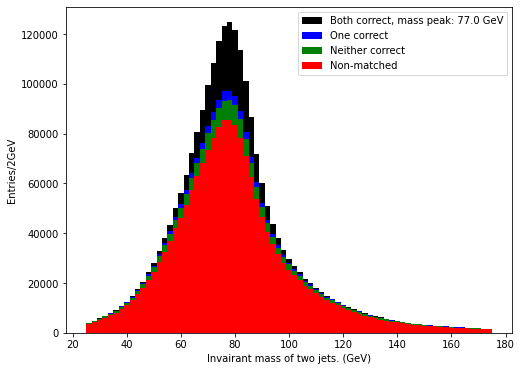

In [22]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_case_1_alex+mjj_case_2_alex+ mjj_case_3_alex+mjj_case_4_alex, bins=75, range=(25,175) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_case_1_alex+mjj_case_2_alex+ mjj_case_3_alex+mjj_case_4_alex, bins=75, histtype="stepfilled", range=(25,175), label="Both correct, mass peak: {} GeV".format(width[legend]), color='black', stacked=True)
plt.hist(mjj_case_4_alex+mjj_case_3_alex+mjj_case_2_alex, bins=75, histtype="stepfilled", range=(25,175), label="One correct", color='blue', stacked=True)
plt.hist(mjj_case_4_alex+mjj_case_3_alex, bins=75, histtype="stepfilled", range=(25,175), label="Neither correct", color='green', stacked=True)
plt.hist(mjj_case_4_alex, bins=75, histtype="stepfilled", range=(25,175), label='Non-matched', color='red', stacked=True)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj_alex_FIX_JES.png")

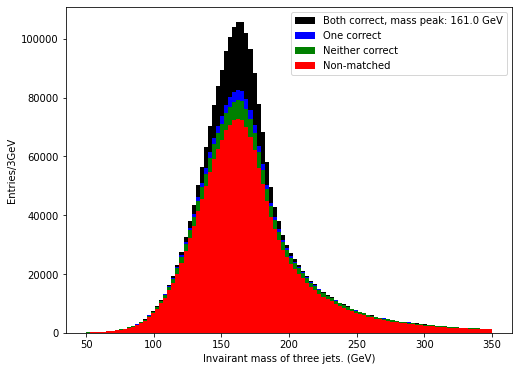

In [23]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjjj_case_1_alex+mjjj_case_2_alex+ mjjj_case_3_alex+mjjj_case_4_alex, bins=100, range=(50,350) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjjj_case_1_alex+mjjj_case_2_alex+ mjjj_case_3_alex+mjjj_case_4_alex, bins=100, histtype="stepfilled", range=(50,350), label="Both correct, mass peak: {} GeV".format(width[legend]), color='black', stacked=True)
plt.hist(mjjj_case_4_alex+mjjj_case_3_alex+mjjj_case_2_alex, bins=100, histtype="stepfilled", range=(50,350), label="One correct", color='blue', stacked=True)
plt.hist(mjjj_case_4_alex+mjjj_case_3_alex, bins=100, histtype="stepfilled", range=(50,350), label="Neither correct", color='green', stacked=True)
plt.hist(mjjj_case_4_alex, bins=100, histtype="stepfilled", range=(50,350), label='Non-matched', color='red', stacked=True)
plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/3GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjjj_alex_FIX_JES.png")

In [24]:
chi2_value_case1_alex = []
chi2_value_case2_alex = []
chi2_value_case3_alex = []
chi2_value_case4_alex = []

for i in tqdm.trange(len(chi2_value)):
    if case[i] == 1:
        chi2_value_case1_alex .append(chi2_value[i])
    elif case[i] == 2:
        chi2_value_case2_alex .append(chi2_value[i])
    elif case[i] == 3:
        chi2_value_case3_alex .append(chi2_value[i])
    else :
        chi2_value_case4_alex .append(chi2_value[i])

100%|██████████| 1184448/1184448 [00:01<00:00, 725299.77it/s]


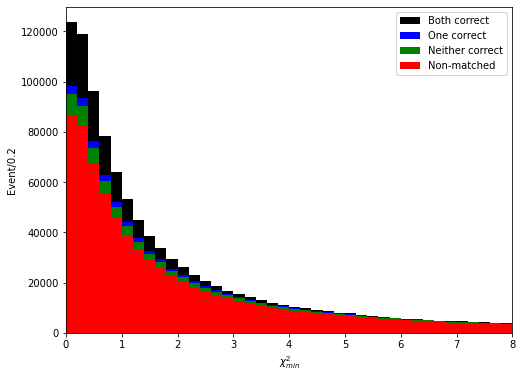

In [25]:
plt.figure(figsize=(8,6))
plt.hist(chi2_value_case4_alex +chi2_value_case3_alex + chi2_value_case2_alex +chi2_value_case1_alex , bins=40, histtype="stepfilled", range=(0,8), label="Both correct", color='black', stacked=True)
plt.hist(chi2_value_case4_alex +chi2_value_case3_alex +chi2_value_case2, bins=40, histtype="stepfilled", range=(0,8), label="One correct", color='blue', stacked=True)
plt.hist(chi2_value_case4_alex +chi2_value_case3_alex , bins=40, histtype="stepfilled", range=(0,8), label="Neither correct", color='green', stacked=True)
plt.hist(chi2_value_case4_alex , bins=40, histtype="stepfilled", range=(0,8), label='Non-matched', color='red', stacked=True)
plt.legend(loc="upper right")
plt.xlabel(r"$\chi^{2}_{min}$")
plt.ylabel("Event/0.2")
plt.xlim(0,8)
plt.savefig("./demo/Pic/evaluation/purity_chi2_dist_alex.png")

## JES corelation 
---

In [26]:
class four_vector_JES():
    def __init__(self, idx1, idx2):
        try:
            self.pt = jet_pt[idx1][idx2]
            self.eta = jet_eta[idx1][idx2]
            self.phi = jet_phi[idx1][idx2]
            self.mass = jet_mass[idx1][idx2]
            scale = -0.0008228230613626063 * self.pt - 0.051359995969670155
            scale = 1 - (scale/2)
            
            tmp_px = self.pt * np.cos(self.phi)
            tmp_py = self.pt * np.sin(self.phi)
            tmp_pz = self.pt * np.sinh(self.eta)
            self.px = tmp_px*scale
            self.py = tmp_py*scale
            self.pz = tmp_pz*scale
            self.e = np.sqrt( (self.px**2 + self.py**2 + self.pz**2) + self.mass**2 )
        except:
            print("Error occur!")
        

In [27]:
mjj_case_1_1 = []
mjj_case_2_1 = []
mjj_case_3_1 = []
mjj_case_4_1 = []

mjj_case_1_2 = []
mjj_case_2_2 = []
mjj_case_3_2 = []
mjj_case_4_2 = []

mjjj_case_1_1 = []
mjjj_case_2_1 = []
mjjj_case_3_1 = []
mjjj_case_4_1 = []

mjjj_case_1_2 = []
mjjj_case_2_2 = []
mjjj_case_3_2 = []
mjjj_case_4_2 = []

def two_jet_inv(target_1, target_2):
    return np.sqrt( ( target_1.e + target_2.e )**2 - ( target_1.px + target_2.px )**2 - ( target_1.py + target_2.py )**2 - ( target_1.pz + target_2.pz )**2)

def three_jet_inv(target_1, target_2, target_3):
    return np.sqrt( ( target_1.e + target_2.e + target_3.e )**2 - ( target_1.px + target_2.px + target_3.px )**2 - ( target_1.py + target_2.py + target_3.py )**2 - ( target_1.pz + target_2.pz + target_3.pz )**2)


for i in tqdm.trange(len(predictions)):
# for i in range(0,50):
    b_1_chi2_idx = pair_info_chi2[i][0]
    q_1_chi2_idx = pair_info_chi2[i][1]
    q_2_chi2_idx = pair_info_chi2[i][2]
    b_2_chi2_idx = pair_info_chi2[i][3]
    q_3_chi2_idx = pair_info_chi2[i][4]
    q_4_chi2_idx = pair_info_chi2[i][5]

    tmp_b_1 = four_vector_JES(i, int(b_1_chi2_idx))
    tmp_q_1 = four_vector_JES(i, int(q_1_chi2_idx))
    tmp_q_2 = four_vector_JES(i, int(q_2_chi2_idx))
    tmp_b_2 = four_vector_JES(i, int(b_2_chi2_idx))
    tmp_q_3 = four_vector_JES(i, int(q_3_chi2_idx))
    tmp_q_4 = four_vector_JES(i, int(q_4_chi2_idx))

    tmp_mjj_1, tmp_mjj_2, tmp_mjjj_1, tmp_mjjj_2 = 0,0,0,0
    try: 
        tmp_mjj_1 = two_jet_inv(tmp_q_1, tmp_q_2)
        tmp_mjj_2 = two_jet_inv(tmp_q_3, tmp_q_4)

        tmp_mjjj_1 = three_jet_inv(tmp_b_1, tmp_q_1, tmp_q_2)
        tmp_mjjj_2 = three_jet_inv(tmp_b_2, tmp_q_3, tmp_q_4)
    except:
        pass

    if case[i] == 1:
        mjj_case_1_1.append(tmp_mjj_1)
        mjj_case_1_2.append(tmp_mjj_2)

        mjjj_case_1_1.append(tmp_mjjj_1)
        mjjj_case_1_2.append(tmp_mjjj_2)
    elif case[i] == 2:
        mjj_case_2_1.append(tmp_mjj_1)
        mjj_case_2_2.append(tmp_mjj_2)

        mjjj_case_2_1.append(tmp_mjjj_1)
        mjjj_case_2_2.append(tmp_mjjj_2)
    elif case[i] == 3:
        mjj_case_3_1.append(tmp_mjj_1)
        mjj_case_3_2.append(tmp_mjj_2)

        mjjj_case_3_1.append(tmp_mjjj_1)
        mjjj_case_3_2.append(tmp_mjjj_2)
    else:
        mjj_case_4_1.append(tmp_mjj_1)
        mjj_case_4_2.append(tmp_mjj_2)

        mjjj_case_4_1.append(tmp_mjjj_1)
        mjjj_case_4_2.append(tmp_mjjj_2)

100%|██████████| 1184256/1184256 [02:56<00:00, 6695.06it/s]


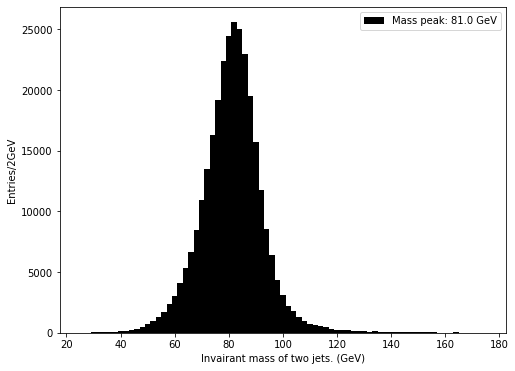

In [33]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_case_1_1+mjj_case_1_2, bins=75, range=(25,175) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_case_1_1+mjj_case_1_2, bins=75, histtype="stepfilled", range=(25,175), label="Mass peak: {} GeV".format(width[legend]), color='black', stacked=True)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj_JES.png")

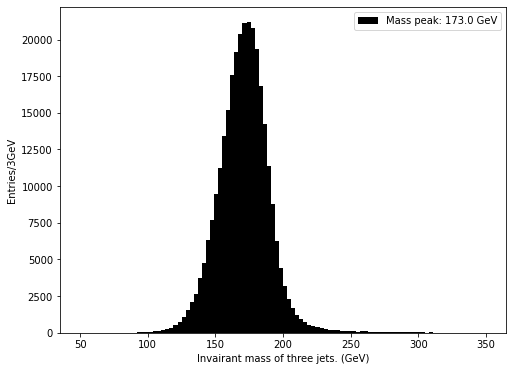

In [57]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjjj_case_1_1+mjjj_case_1_2, bins=100, range=(50,350) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjjj_case_1_1+mjjj_case_1_2, bins=100, histtype="stepfilled", range=(50,350), label="Mass peak: {0} GeV".format(width[legend]), color='black', stacked=True)
plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/3GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjjj_JES.png")

In [58]:
mjj_diff = []
mjjj_diff = []
for i in range(len(mjj_case_1_1)):
    mjj_diff.append(mjj_case_1_1[i]-mjj_case_1_2[i])
for i in range(len(mjjj_case_1_1)):
    mjjj_diff.append(mjjj_case_1_1[i]-mjjj_case_1_2[i])

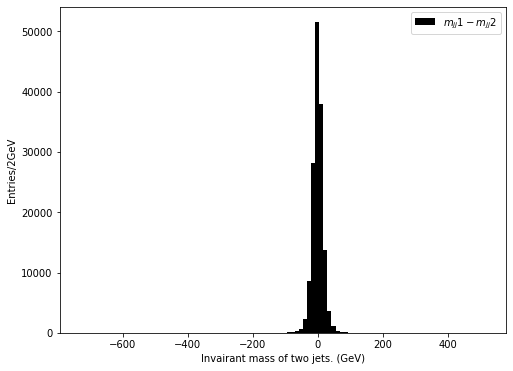

In [63]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_diff)
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_diff, histtype="stepfilled", label=r"$m_{jj}1-m_{jj}2$", color='black', stacked=True, bins=100)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj1-mjj2_JES.png")

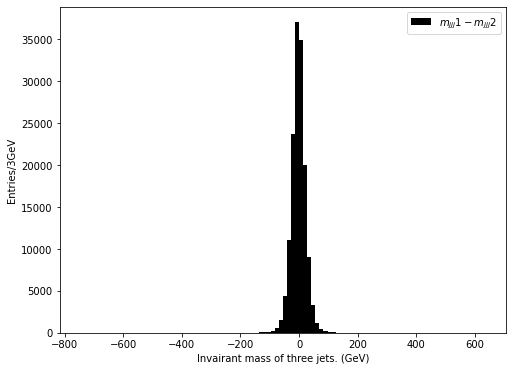

In [64]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjjj_diff)
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjjj_diff, histtype="stepfilled", label=r"$m_{jjj}1-m_{jjj}2$", color='black', stacked=True, bins=100)
plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/3GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjjj1-mjjj2_JES.png")

In [47]:
mjj_case_1_alex_1 = []
mjj_case_2_alex_1 = []
mjj_case_3_alex_1 = []
mjj_case_4_alex_1 = []

mjjj_case_1_alex_1 = []
mjjj_case_2_alex_1 = []
mjjj_case_3_alex_1 = []
mjjj_case_4_alex_1 = []

mjj_case_1_alex_2 = []
mjj_case_2_alex_2 = []
mjj_case_3_alex_2 = []
mjj_case_4_alex_2 = []

mjjj_case_1_alex_2 = []
mjjj_case_2_alex_2 = []
mjjj_case_3_alex_2 = []
mjjj_case_4_alex_2 = []

def two_jet_inv(target_1, target_2):
    return np.sqrt( ( target_1.e + target_2.e )**2 - ( target_1.px + target_2.px )**2 - ( target_1.py + target_2.py )**2 - ( target_1.pz + target_2.pz )**2)

def three_jet_inv(target_1, target_2, target_3):
    return np.sqrt( ( target_1.e + target_2.e + target_3.e )**2 - ( target_1.px + target_2.px + target_3.px )**2 - ( target_1.py + target_2.py + target_3.py )**2 - ( target_1.pz + target_2.pz + target_3.pz )**2)


for i in tqdm.trange(len(predictions)):
    b_1_chi2_idx = pair_info_chi2_alex[i][0]
    q_1_chi2_idx = pair_info_chi2_alex[i][1]
    q_2_chi2_idx = pair_info_chi2_alex[i][2]
    b_2_chi2_idx = pair_info_chi2_alex[i][3]
    q_3_chi2_idx = pair_info_chi2_alex[i][4]
    q_4_chi2_idx = pair_info_chi2_alex[i][5]

    tmp_b_1 = four_vector_JES(i, int(b_1_chi2_idx))
    tmp_q_1 = four_vector_JES(i, int(q_1_chi2_idx))
    tmp_q_2 = four_vector_JES(i, int(q_2_chi2_idx))
    tmp_b_2 = four_vector_JES(i, int(b_2_chi2_idx))
    tmp_q_3 = four_vector_JES(i, int(q_3_chi2_idx))
    tmp_q_4 = four_vector_JES(i, int(q_4_chi2_idx))

    tmp_mjj_1, tmp_mjj_2, tmp_mjjj_1, tmp_mjjj_2 = 0,0,0,0
    try: 
        tmp_mjj_1 = two_jet_inv(tmp_q_1, tmp_q_2)
        tmp_mjj_2 = two_jet_inv(tmp_q_3, tmp_q_4)

        tmp_mjjj_1 = three_jet_inv(tmp_b_1, tmp_q_1, tmp_q_2)
        tmp_mjjj_2 = three_jet_inv(tmp_b_2, tmp_q_3, tmp_q_4)
    except:
        pass

    if case_alex[i] == 1:
        mjj_case_1_alex_1.append(tmp_mjj_1)
        mjj_case_1_alex_2.append(tmp_mjj_2)

        mjjj_case_1_alex_1.append(tmp_mjjj_1)
        mjjj_case_1_alex_2.append(tmp_mjjj_2)
    elif case_alex[i] == 2:
        mjj_case_2_alex_1.append(tmp_mjj_1)
        mjj_case_2_alex_2.append(tmp_mjj_2)

        mjjj_case_2_alex_1.append(tmp_mjjj_1)
        mjjj_case_2_alex_2.append(tmp_mjjj_2)
    elif case_alex[i] == 3:
        mjj_case_3_alex_1.append(tmp_mjj_1)
        mjj_case_3_alex_2.append(tmp_mjj_2)

        mjjj_case_3_alex_1.append(tmp_mjjj_1)
        mjjj_case_3_alex_2.append(tmp_mjjj_2)
    else:
        mjj_case_4_alex_1.append(tmp_mjj_1)
        mjj_case_4_alex_2.append(tmp_mjj_2)

        mjjj_case_4_alex_1.append(tmp_mjjj_1)
        mjjj_case_4_alex_2.append(tmp_mjjj_2)

100%|██████████| 1184256/1184256 [02:58<00:00, 6632.11it/s]


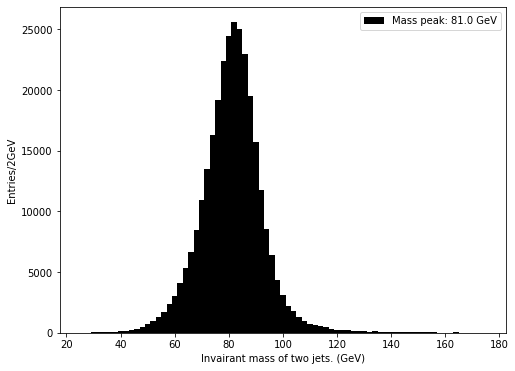

In [48]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_case_1_alex_1+mjj_case_1_alex_2, bins=75, range=(25,175) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_case_1_alex_1+mjj_case_1_alex_2, bins=75, histtype="stepfilled", range=(25,175), label="Mass peak: {} GeV".format(width[legend]), color='black', stacked=True)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj_JES_alex.png")

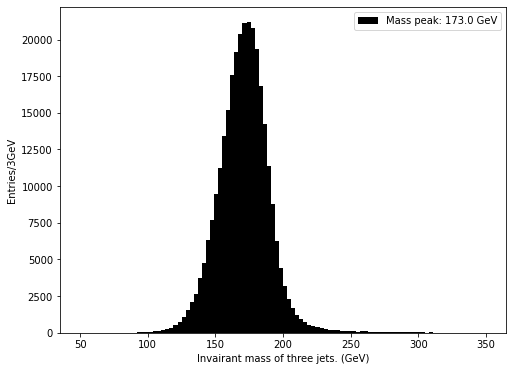

In [49]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjjj_case_1_alex_1+mjjj_case_1_alex_2, bins=100, range=(50,350) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjjj_case_1_alex_1+mjjj_case_1_alex_2, bins=100, histtype="stepfilled", range=(50,350), label="Mass peak: {} GeV".format(width[legend]), color='black', stacked=True)
plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/3GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjjj_JES_alex.png")

In [54]:
mjj_diff_alex = []
mjjj_diff_alex = []
for i in range(len(mjj_case_1_alex_1)):
    mjj_diff_alex.append(mjj_case_1_alex_1[i]-mjj_case_1_alex_2[i])
for i in range(len(mjjj_case_1_alex_1)):
    mjjj_diff_alex.append(mjjj_case_1_alex_1[i]-mjjj_case_1_alex_2[i])

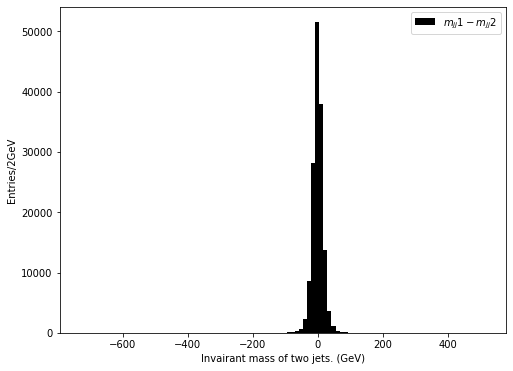

In [65]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_diff_alex)
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_diff_alex, histtype="stepfilled", label=r"$m_{jj}1-m_{jj}2$", color='black', stacked=True, bins=100)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj1-mjj2_JES_alex.png")

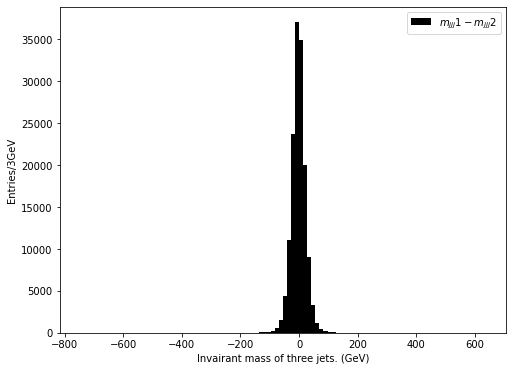

In [66]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjjj_diff_alex)
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjjj_diff_alex, histtype="stepfilled", label=r"$m_{jjj}1-m_{jjj}2$", color='black', stacked=True, bins=100)
plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/3GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjjj1-mjjj2_JES_alex.png")

## Fix JES corelation
---

In [67]:
class four_vector_FIX_JES():
    def __init__(self, idx1, idx2):
        try:
            self.pt = jet_pt[idx1][idx2]
            self.eta = jet_eta[idx1][idx2]
            self.phi = jet_phi[idx1][idx2]
            self.mass = jet_mass[idx1][idx2]
            scale_fix = -0.0008228230613626063 * self.pt - 0.051359995969670155
            scale_fix = 1 - (scale_fix/2)
            tmp_px = self.pt * np.cos(self.phi)
            tmp_py = self.pt * np.sin(self.phi)
            tmp_pz = self.pt * np.sinh(self.eta)
            self.px = tmp_px*scale_fix
            self.py = tmp_py*scale_fix
            self.pz = tmp_pz*scale_fix
            self.e = np.sqrt( (self.px**2 + self.py**2 + self.pz**2) + self.mass**2 )
        except:
            print("Error occur!")
        

In [68]:
mjj_case_1_1_FIX = []
mjj_case_2_1_FIX = []
mjj_case_3_1_FIX = []
mjj_case_4_1_FIX = []

mjj_case_1_2_FIX = []
mjj_case_2_2_FIX = []
mjj_case_3_2_FIX = []
mjj_case_4_2_FIX = []

mjjj_case_1_1_FIX = []
mjjj_case_2_1_FIX = []
mjjj_case_3_1_FIX = []
mjjj_case_4_1_FIX = []

mjjj_case_1_2_FIX = []
mjjj_case_2_2_FIX = []
mjjj_case_3_2_FIX = []
mjjj_case_4_2_FIX = []

def two_jet_inv(target_1, target_2):
    return np.sqrt( ( target_1.e + target_2.e )**2 - ( target_1.px + target_2.px )**2 - ( target_1.py + target_2.py )**2 - ( target_1.pz + target_2.pz )**2)

def three_jet_inv(target_1, target_2, target_3):
    return np.sqrt( ( target_1.e + target_2.e + target_3.e )**2 - ( target_1.px + target_2.px + target_3.px )**2 - ( target_1.py + target_2.py + target_3.py )**2 - ( target_1.pz + target_2.pz + target_3.pz )**2)


for i in tqdm.trange(len(predictions)):
# for i in range(0,50):
    b_1_chi2_idx = pair_info_chi2[i][0]
    q_1_chi2_idx = pair_info_chi2[i][1]
    q_2_chi2_idx = pair_info_chi2[i][2]
    b_2_chi2_idx = pair_info_chi2[i][3]
    q_3_chi2_idx = pair_info_chi2[i][4]
    q_4_chi2_idx = pair_info_chi2[i][5]

    tmp_b_1 = four_vector_FIX_JES(i, int(b_1_chi2_idx))
    tmp_q_1 = four_vector_FIX_JES(i, int(q_1_chi2_idx))
    tmp_q_2 = four_vector_FIX_JES(i, int(q_2_chi2_idx))
    tmp_b_2 = four_vector_FIX_JES(i, int(b_2_chi2_idx))
    tmp_q_3 = four_vector_FIX_JES(i, int(q_3_chi2_idx))
    tmp_q_4 = four_vector_FIX_JES(i, int(q_4_chi2_idx))

    tmp_mjj_1, tmp_mjj_2, tmp_mjjj_1, tmp_mjjj_2 = 0,0,0,0
    try: 
        tmp_mjj_1 = two_jet_inv(tmp_q_1, tmp_q_2)
        tmp_mjj_2 = two_jet_inv(tmp_q_3, tmp_q_4)

        tmp_mjjj_1 = three_jet_inv(tmp_b_1, tmp_q_1, tmp_q_2)
        tmp_mjjj_2 = three_jet_inv(tmp_b_2, tmp_q_3, tmp_q_4)
    except:
        pass

    if case[i] == 1:
        mjj_case_1_1_FIX.append(tmp_mjj_1)
        mjj_case_1_2_FIX.append(tmp_mjj_2)

        mjjj_case_1_1_FIX.append(tmp_mjjj_1)
        mjjj_case_1_2_FIX.append(tmp_mjjj_2)
    elif case[i] == 2:
        mjj_case_2_1_FIX.append(tmp_mjj_1)
        mjj_case_2_2_FIX.append(tmp_mjj_2)

        mjjj_case_2_1_FIX.append(tmp_mjjj_1)
        mjjj_case_2_2_FIX.append(tmp_mjjj_2)
    elif case[i] == 3:
        mjj_case_3_1_FIX.append(tmp_mjj_1)
        mjj_case_3_2_FIX.append(tmp_mjj_2)

        mjjj_case_3_1_FIX.append(tmp_mjjj_1)
        mjjj_case_3_2_FIX.append(tmp_mjjj_2)
    else:
        mjj_case_4_1_FIX.append(tmp_mjj_1)
        mjj_case_4_2_FIX.append(tmp_mjj_2)

        mjjj_case_4_1_FIX.append(tmp_mjjj_1)
        mjjj_case_4_2_FIX.append(tmp_mjjj_2)

100%|██████████| 1184256/1184256 [02:56<00:00, 6692.60it/s]


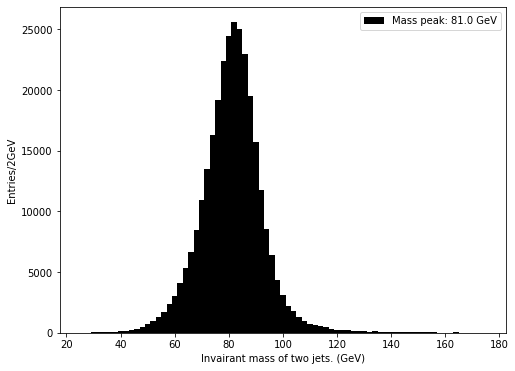

In [69]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_case_1_1_FIX+mjj_case_1_2_FIX, bins=75, range=(25,175) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_case_1_1_FIX+mjj_case_1_2_FIX, bins=75, histtype="stepfilled", range=(25,175), label="Mass peak: {0} GeV".format(width[legend]), color='black', stacked=True)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj_JES_FIX.png")

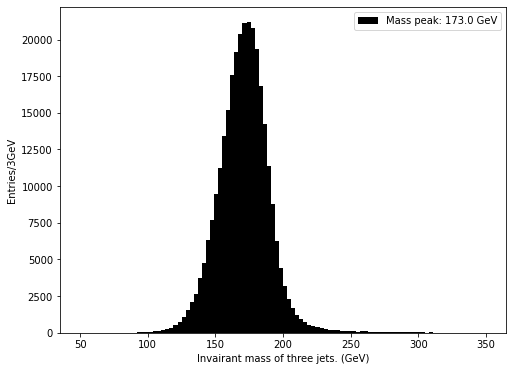

In [70]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjjj_case_1_1_FIX+mjjj_case_1_2_FIX, bins=100, range=(50,350) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjjj_case_1_1_FIX+mjjj_case_1_2_FIX, bins=100, histtype="stepfilled", range=(50,350), label="Mass peak: {0} GeV".format(width[legend]), color='black', stacked=True)
plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/3GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjjj_JES_FIX.png")

In [71]:
mjj_diff_FIX = []
mjjj_diff_FIX = []
for i in range(len(mjj_case_1_1_FIX)):
    mjj_diff_FIX.append(mjj_case_1_1_FIX[i]-mjj_case_1_2_FIX[i])
for i in range(len(mjjj_case_1_1)):
    mjjj_diff_FIX.append(mjjj_case_1_1_FIX[i]-mjjj_case_1_2_FIX[i])

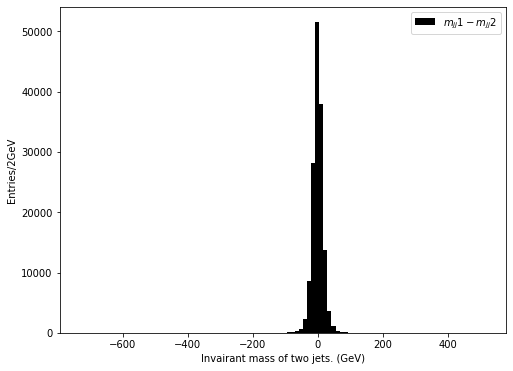

In [72]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_diff_FIX)
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_diff_FIX, histtype="stepfilled", label=r"$m_{jj}1-m_{jj}2$", color='black', stacked=True, bins=100)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj1-mjj2_JES_FIX.png")

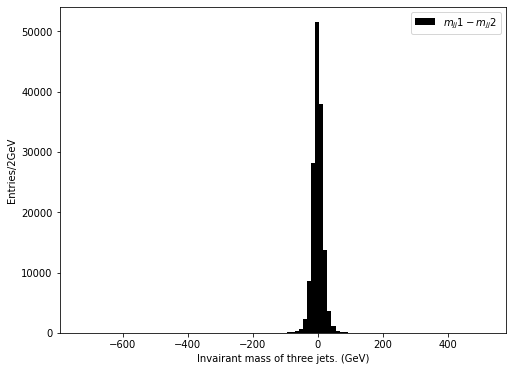

In [74]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_diff_FIX)
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_diff_FIX, histtype="stepfilled", label=r"$m_{jj}1-m_{jj}2$", color='black', stacked=True, bins=100)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj1-mjj2_JES_FIX.png")

In [75]:
mjj_case_1_alex_1_FIX = []
mjj_case_2_alex_1_FIX = []
mjj_case_3_alex_1_FIX = []
mjj_case_4_alex_1_FIX = []

mjjj_case_1_alex_1_FIX = []
mjjj_case_2_alex_1_FIX = []
mjjj_case_3_alex_1_FIX = []
mjjj_case_4_alex_1_FIX = []

mjj_case_1_alex_2_FIX = []
mjj_case_2_alex_2_FIX = []
mjj_case_3_alex_2_FIX = []
mjj_case_4_alex_2_FIX = []

mjjj_case_1_alex_2_FIX = []
mjjj_case_2_alex_2_FIX = []
mjjj_case_3_alex_2_FIX = []
mjjj_case_4_alex_2_FIX = []

def two_jet_inv(target_1, target_2):
    return np.sqrt( ( target_1.e + target_2.e )**2 - ( target_1.px + target_2.px )**2 - ( target_1.py + target_2.py )**2 - ( target_1.pz + target_2.pz )**2)

def three_jet_inv(target_1, target_2, target_3):
    return np.sqrt( ( target_1.e + target_2.e + target_3.e )**2 - ( target_1.px + target_2.px + target_3.px )**2 - ( target_1.py + target_2.py + target_3.py )**2 - ( target_1.pz + target_2.pz + target_3.pz )**2)


for i in tqdm.trange(len(predictions)):
    b_1_chi2_idx = pair_info_chi2_alex[i][0]
    q_1_chi2_idx = pair_info_chi2_alex[i][1]
    q_2_chi2_idx = pair_info_chi2_alex[i][2]
    b_2_chi2_idx = pair_info_chi2_alex[i][3]
    q_3_chi2_idx = pair_info_chi2_alex[i][4]
    q_4_chi2_idx = pair_info_chi2_alex[i][5]

    tmp_b_1 = four_vector_JES(i, int(b_1_chi2_idx))
    tmp_q_1 = four_vector_JES(i, int(q_1_chi2_idx))
    tmp_q_2 = four_vector_JES(i, int(q_2_chi2_idx))
    tmp_b_2 = four_vector_JES(i, int(b_2_chi2_idx))
    tmp_q_3 = four_vector_JES(i, int(q_3_chi2_idx))
    tmp_q_4 = four_vector_JES(i, int(q_4_chi2_idx))

    tmp_mjj_1, tmp_mjj_2, tmp_mjjj_1, tmp_mjjj_2 = 0,0,0,0
    try: 
        tmp_mjj_1 = two_jet_inv(tmp_q_1, tmp_q_2)
        tmp_mjj_2 = two_jet_inv(tmp_q_3, tmp_q_4)

        tmp_mjjj_1 = three_jet_inv(tmp_b_1, tmp_q_1, tmp_q_2)
        tmp_mjjj_2 = three_jet_inv(tmp_b_2, tmp_q_3, tmp_q_4)
    except:
        pass

    if case_alex[i] == 1:
        mjj_case_1_alex_1_FIX.append(tmp_mjj_1)
        mjj_case_1_alex_2_FIX.append(tmp_mjj_2)

        mjjj_case_1_alex_1_FIX.append(tmp_mjjj_1)
        mjjj_case_1_alex_2_FIX.append(tmp_mjjj_2)
    elif case_alex[i] == 2:
        mjj_case_2_alex_1_FIX.append(tmp_mjj_1)
        mjj_case_2_alex_2_FIX.append(tmp_mjj_2)

        mjjj_case_2_alex_1_FIX.append(tmp_mjjj_1)
        mjjj_case_2_alex_2_FIX.append(tmp_mjjj_2)
    elif case_alex[i] == 3:
        mjj_case_3_alex_1_FIX.append(tmp_mjj_1)
        mjj_case_3_alex_2_FIX.append(tmp_mjj_2)

        mjjj_case_3_alex_1_FIX.append(tmp_mjjj_1)
        mjjj_case_3_alex_2_FIX.append(tmp_mjjj_2)
    else:
        mjj_case_4_alex_1_FIX.append(tmp_mjj_1)
        mjj_case_4_alex_2_FIX.append(tmp_mjj_2)

        mjjj_case_4_alex_1_FIX.append(tmp_mjjj_1)
        mjjj_case_4_alex_2_FIX.append(tmp_mjjj_2)

100%|██████████| 1184256/1184256 [02:56<00:00, 6697.46it/s]


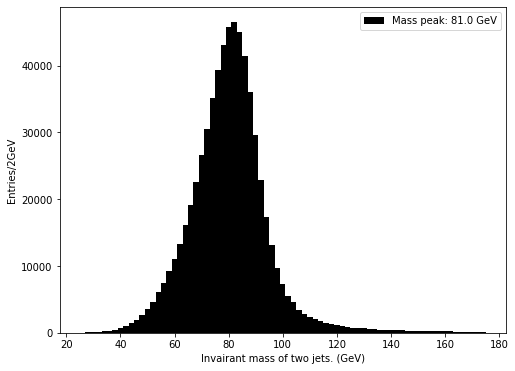

In [76]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_case_1_alex_1_FIX+mjj_case_1_alex_2_FIX, bins=75, range=(25,175) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_case_1_alex_1_FIX+mjj_case_1_alex_2_FIX, bins=75, histtype="stepfilled", range=(25,175), label="Mass peak: {} GeV".format(width[legend]), color='black', stacked=True)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj_JES_FIX_alex.png")

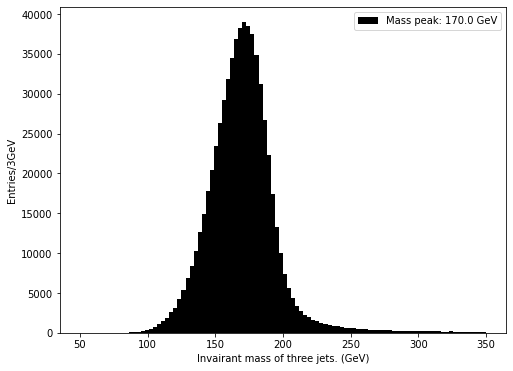

In [77]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjjj_case_1_alex_1_FIX+mjjj_case_1_alex_2_FIX, bins=100, range=(50,350) )
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjjj_case_1_alex_1_FIX+mjjj_case_1_alex_2_FIX, bins=100, histtype="stepfilled", range=(50,350), label="Mass peak: {} GeV".format(width[legend]), color='black', stacked=True)
plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/3GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjjj_JES_FIX_alex.png")

In [78]:
mjj_diff_alex_FIX = []
mjjj_diff_alex_FIX = []
for i in range(len(mjj_case_1_alex_1_FIX)):
    mjj_diff_alex_FIX.append(mjj_case_1_alex_1_FIX[i]-mjj_case_1_alex_2_FIX[i])
for i in range(len(mjjj_case_1_alex_1_FIX)):
    mjjj_diff_alex_FIX.append(mjjj_case_1_alex_1_FIX[i]-mjjj_case_1_alex_2_FIX[i])

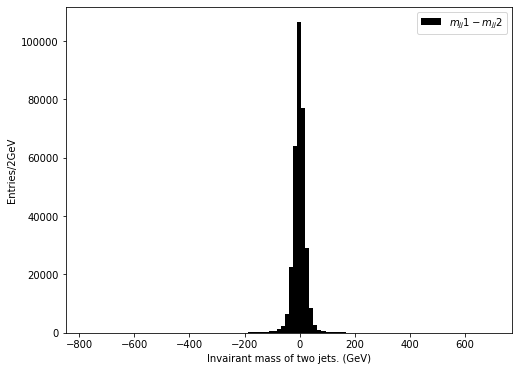

In [79]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjj_diff_alex_FIX)
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjj_diff_alex_FIX, histtype="stepfilled", label=r"$m_{jj}1-m_{jj}2$", color='black', stacked=True, bins=100)

plt.legend(loc="upper right")
plt.xlabel("Invairant mass of two jets. (GeV)")
plt.ylabel("Entries/2GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjj1-mjj2_JES_FIX_alex.png")

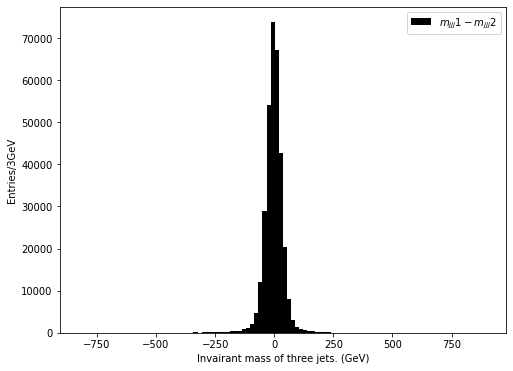

In [80]:
plt.figure(figsize=(8,6))
height, width = np.histogram(mjjj_diff_alex_FIX)
maxi =  height.max()
idxx = np.where( height == maxi ) 
legend = idxx[0].max()
plt.hist(mjjj_diff_alex_FIX, histtype="stepfilled", label=r"$m_{jjj}1-m_{jjj}2$", color='black', stacked=True, bins=100)
plt.legend(loc="upper right")
plt.xlabel("Invairant mass of three jets. (GeV)")
plt.ylabel("Entries/3GeV")
plt.savefig("./demo/Pic/evaluation/purity_inv_mass_mjjj1-mjjj2_JES_FIX_alex.png")